In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


### Data set "Animals"

[Animals dataset](https://stat.ethz.ch/R-manual/R-patched/library/MASS/html/Animals.html)

Average brain and body weights for 28 species of land animals.

In [3]:
url = 'https://drive.google.com/file/d/1wfUUKU2VbmK-WzehMKft8u1WMEfyOXTy/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

In [4]:
data = pd.read_csv(dwn_url, header=0, index_col=0)

- We want to use a linear model to study the relation between the brain weight and the body weight

- Simple linear regression (one predictor):

$brain=\beta_0+\beta_1*body+\varepsilon$


### Regression assumption on Y

- Our model: $Y=\beta_0+\beta_1*x+\varepsilon$

- Given that we assume the errors $\varepsilon$ to have normal distribution $\mathcal{N}(0,\sigma^2)$, we assume that also $Y$ are normally distributed.

- Check the assumption on $Y$

- If the response variable is not gaussian, a linear model should not be used.



### Transformations

Apply the necessary transformations to Y and X, use log tranformation.

In [5]:
#Apply the necessary transformations to the data
data['log_brain'] = np.log(data['brain'])
data['log_body'] = np.log(data['body'])


### Outliers

Detect the outliers using boxplots, histograms or scatter plots. Findout which are the animals corresponding to the outliers.

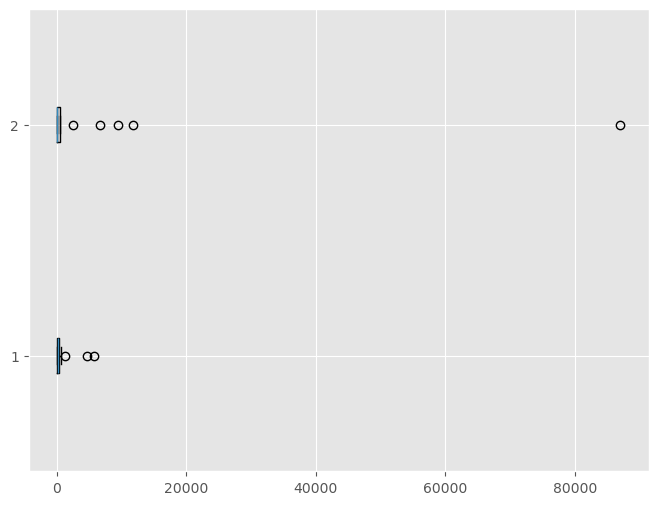

In [6]:
#Detect the outliers using boxplot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot(data[['brain', 'body']], vert=False)
plt.show()



In [7]:
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir los límites para los outliers
        lower_bound = Q1 - 15.5 * IQR
        upper_bound = Q3 + 15.5 * IQR
        
        # Identificar outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Imprimir outliers para cada columna
        print(outliers[column])
    
    return outliers

# Obtener outliers
outliers = detect_outliers(data)

                  body  brain  log_brain   log_body
Dipliodocus    11700.0   50.0   3.912023   9.367344
Triceratops     9400.0   70.0   4.248495   9.148465
Brachiosaurus  87000.0  154.5   5.040194  11.373663
Empty DataFrame
Columns: [body, brain, log_brain, log_body]
Index: []
Empty DataFrame
Columns: [body, brain, log_brain, log_body]
Index: []
Empty DataFrame
Columns: [body, brain, log_brain, log_body]
Index: []


In [8]:
#Identify the outliers
outliers = data[data['brain'] > 200]
outliers

,body,brain,log_brain,log_body
Cow,465.00,423.0,6.047372,6.142037
Asian elephant,2547.00,4603.0,8.434464,7.842671
Donkey,187.10,419.0,6.037871,5.231643
Horse,521.00,655.0,6.484635,6.255750
Giraffe,529.00,680.0,6.522093,6.270988
Gorilla,207.00,406.0,6.006353,5.332719
Human,62.00,1320.0,7.185387,4.127134
African elephant,6654.00,5712.0,8.650325,8.802973
Chimpanzee,52.16,440.0,6.086775,3.954316


## Linear regression 1

Apply a simple linear regression using the model:

$\log(brain)=\beta_0+\beta_1*log(body)+\varepsilon $

In [9]:
import statsmodels.api as sm
xc = sm.add_constant(data['log_body'])
model = sm.OLS(data['log_brain'], data['log_body'])

results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_brain   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                              99.10
Date:                Thu, 22 Aug 2024   Prob (F-statistic):                    1.56e-10
Time:                        22:03:37   Log-Likelihood:                         -63.293
No. Observations:                  28   AIC:                                      128.6
Df Residuals:                      27   BIC:                                      129.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
results.params

log_body    0.84094
dtype: float64

Denoting with $Y_i$ the observations and with $\hat{Y_i}$ the estimations, the residuals are:

$residuals=|Y_i-\hat{Y_i}|$


Draw an histogram of the residuals and a scatter plot of residuals vs fittedvalues. Do the plots suggest a proper residual behavior?

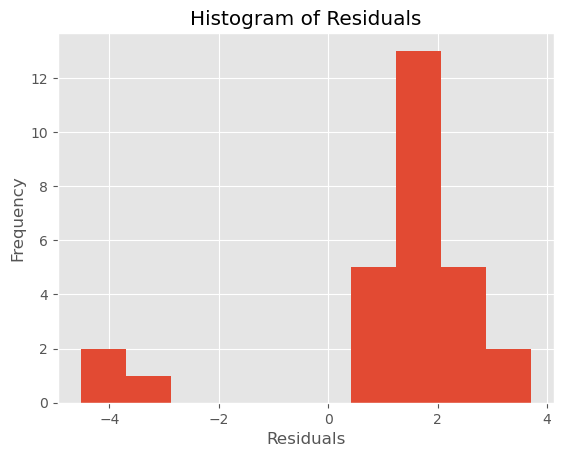

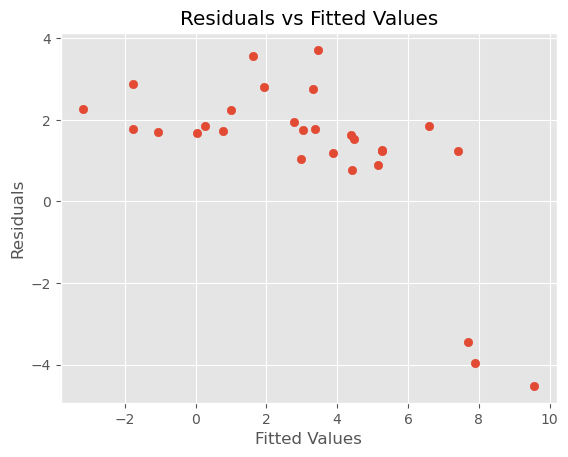

In [11]:
#Draw an histogram of the residuals and a scatter plot of residuals vs fittedvalues. Do the plots suggest a proper residual behavior?
# Draw an histogram of the residuals
plt.hist(results.resid, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Scatter plot of residuals vs fitted values
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Draw the regression line on the X,Y scatter plot.

C:\Users\gusal\AppData\Local\Temp\ipykernel_27628\1644374036.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yy = data['log_body'] * results.params[0]


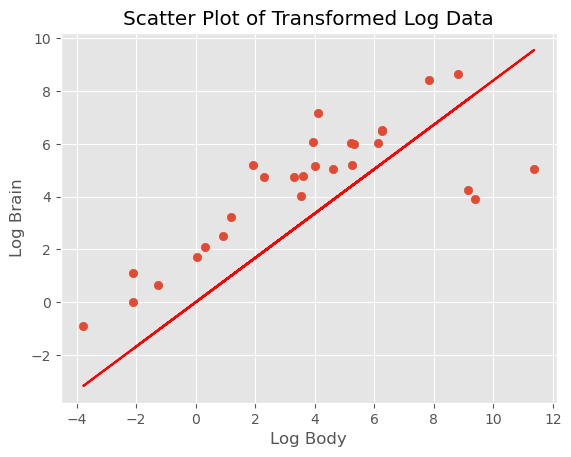

In [12]:
fig, ax = plt.subplots()
yy = data['log_body'] * results.params[0]

# Scatter plot
ax.scatter(data['log_body'], data['log_brain'])

# Set labels and title
ax.set_xlabel('Log Body')
ax.set_ylabel('Log Brain')
ax.set_title('Scatter Plot of Transformed Log Data')

# Plot the line
ax.plot(data['log_body'], yy, color='red')

# Show the plot
plt.show()


### Dummy variables

Should I treat dinosaurs independently? One can make the dataset more interesting introducing dummy variables, one for each type of dinosaurs.

Create four dummy variables: one for Triceratops, one for Dipliodocus, one for Brachiosaurus and one for dinosaur in general.


### Regression model with dummy variables: Linear regression 2

- New model with extra predictors:

$log(brain)=\beta_0+\beta_1*log(body)+\beta_2*DummyT+\beta_3*DummyD+\beta_4*DummyB+\varepsilon$

- A different intercept if it is a dinosaur. Suppose the animal is a triceratop: the variable DummyT is equal to 1, DummyD=DummyB=0.

$\log(brain)=\beta_0+\beta_1*log(body)+\beta_2=$

$(\beta_0+\beta_2)+\beta_1*log(body)$

The intercept is $\beta_0$ when the animal is not a triceratop, while it's $\beta_0+\beta_2$ when the animal is a triceratop.

With this model we consider three different intercepts for the three dinosaurs.



In [13]:
data.head()

,body,brain,log_brain,log_body
Mountain beaver,1.35,8.1,2.091864,0.300105
Cow,465.00,423.0,6.047372,6.142037
Grey wolf,36.33,119.5,4.783316,3.592644
Goat,27.66,115.0,4.744932,3.319987
Guinea pig,1.04,5.5,1.704748,0.039221


In [14]:
#Introduce dummy variables for each dinosaur outlier (Triceratops, Diplodocus, Brachiosaursu, Dinosaurs)
#Define dummy variable classificication columns (DummyT, DummyD, DummyB, DummyG)
data['DummyT'] = 0
data.loc[data.index == 'Triceratops', 'DummyT'] = 1
data['DummyD'] = 0
data.loc[data.index == 'Dipliodocus', 'DummyD'] = 1
data['DummyB'] = 0
data.loc[data.index == 'Brachiosaurus', 'DummyB'] = 1

#Define dummy variable for dinosaurs (Logic OR of the previous dummy variables)
data['Dinosaur'] = data['DummyT'] | data['DummyD'] | data['DummyB']

In [15]:
#Create second model using the log transformed data and 3 extra predictors (DummyT, DummyD, DummyB)
x2 = data[['log_body', 'DummyT', 'DummyD', 'DummyB']]
# Add a constant to the model
xc2 = sm.add_constant(x2)
First_dinosaurs_model = sm.OLS(data['log_brain'], xc2)
#Fit the model
First_dinosaurs_model_results = First_dinosaurs_model.fit()
print(First_dinosaurs_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_brain   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     68.00
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.10e-12
Time:                        22:03:37   Log-Likelihood:                -28.004
No. Observations:                  28   AIC:                             66.01
Df Residuals:                      23   BIC:                             72.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1504      0.201     10.720      0.0

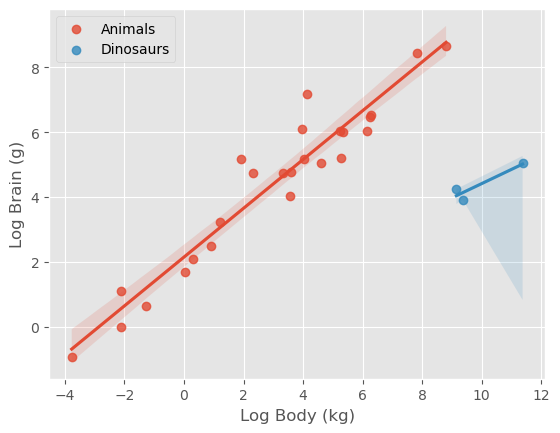

In [16]:
# Plotting the model without dinosaur outliers
sns.regplot(x='log_body', y='log_brain', data=data[data['Dinosaur'] == 0], label='Animals')

# Plotting the model with dinosaur dummies
sns.regplot(x='log_body', y='log_brain', data=data[data['Dinosaur'] == 1], label='Dinosaurs')

# Customize plot
plt.legend()
plt.xlabel('Log Body (kg)')
plt.ylabel('Log Brain (g)')
plt.show()


In [17]:
#Make predictions using the model 
#Predict the brain size of a dinosaur with a body size of _
X_new = pd.DataFrame((1, np.log(0.0259), 0, 0, 0), index=['const', 'log_body', 'DummyT', 'DummyD', 'DummyB']).T
First_dinosaurs_model_prediction = First_dinosaurs_model_results.get_prediction(X_new).summary_frame(0.05)
First_dinosaurs_model_prediction

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.597982,0.338221,-1.297645,0.101681,-2.254504,1.058541


### Annotations:


### Linear regression 3

- Model 2: same rate of change, but different intercept for dinasaurs

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\varepsilon$

 For an animal different from a dinosaur, the intercept is $\beta_0$. For a dinosaur the intercept is $\beta_0+\beta_2$.




In [18]:
#Create third model using the log transformed data and 3 extra predictors (DummyT, DummyD, DummyB) and their interactions

 ### Linear regression 4

 Different intercept and slope for dinosaurs. We add the feature where we multiply the variables "Dino" and "log(body)".

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\beta_3*log(body)*Dino+\varepsilon$

For an animal other than a dinosaur, the intercept is $\beta_0$ and the slope $\beta_1$. For a dinosaur, the intercept is $\beta_0+\beta_2$ and the slope is $\beta_1+\beta_3$.

Which is the best model?